In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv

--2025-04-02 00:27:48--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-04-02 00:27:48--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv’

framingham.csv      100%[===================>] 191.36K  --.-KB/s    in 0.03s   

2025-04-02 00:27:48 (5.75 MB/s) - ‘framingham.csv’ save

## LOGISTIC REGRESSION - HEART DISEASE PREDICTION

###Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

###Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

###Demographic:
    • Sex: male or female(Nominal)
    • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
###Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Cargar Datos

In [31]:
import pandas as pd
data = pd.read_csv("framingham.csv")

In [32]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Descriptiva

#### Cuantos datos tiene la tabla

In [71]:
data.shape

(3656, 16)

#### Medidas de tendencia central de las variables.

In [45]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### Grafico de Barras con el número de hombres y mujeres

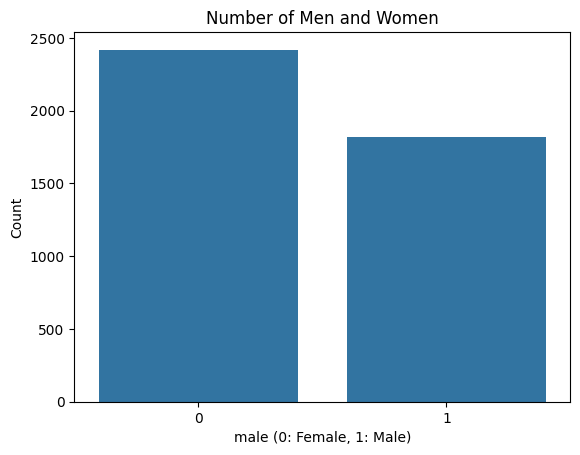

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='male', data=data)
plt.title('Number of Men and Women')
plt.xlabel('male (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

#### Realice un ggrafico de Barras de TenYearCHD

*   Elemento de lista
*   Elemento de lista



<Axes: xlabel='TenYearCHD', ylabel='count'>

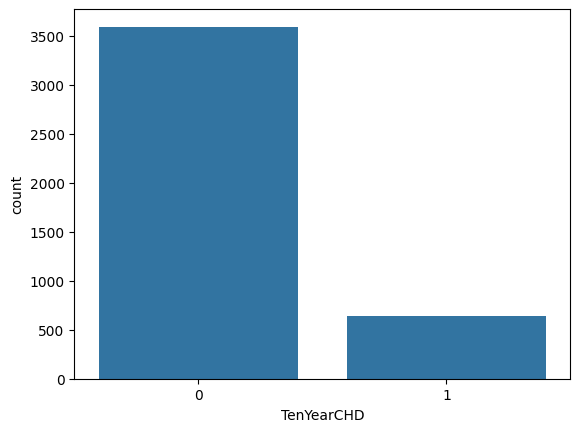

In [47]:
import seaborn as sns
sns.barplot(data["TenYearCHD"].value_counts())

#### Realice un grafico de densidad del BMI

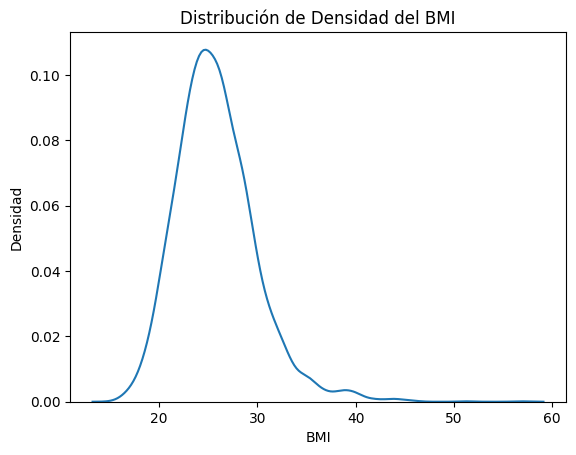

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data["BMI"])
plt.title('Distribución de Densidad del BMI')
plt.xlabel('BMI')
plt.ylabel('Densidad')
plt.show()

#### Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?

_Respuesta:_ En promedio el genero con mayor BMI es el Femenino

<Axes: xlabel='BMI', ylabel='Density'>

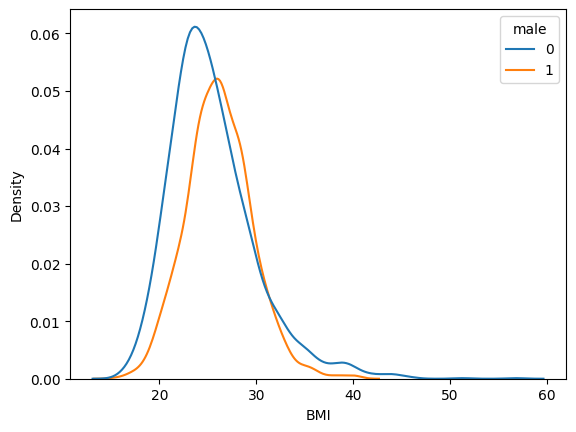

In [49]:
sns.kdeplot(data = data ,x = "BMI", hue="male")

In [50]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#### Realice un mapa de calor entre las variables (heatmap) y diga cual es el par de variables más correlacionadas. Recuerde que para sacar la correlacion puede usar data.corr()

<Axes: >

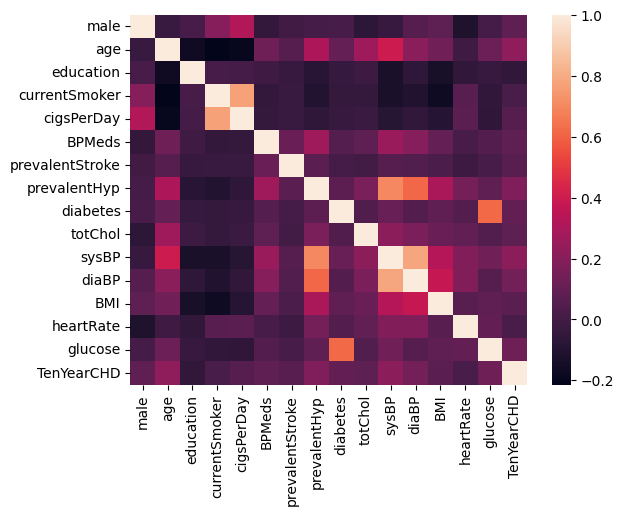

In [51]:
sns.heatmap(data.corr())

¿Haga un boxplot por genero para cada una de estas tres variables :BMI,	heartRate y	glucose.¿hay outliers ?

<Axes: xlabel='male', ylabel='BMI'>

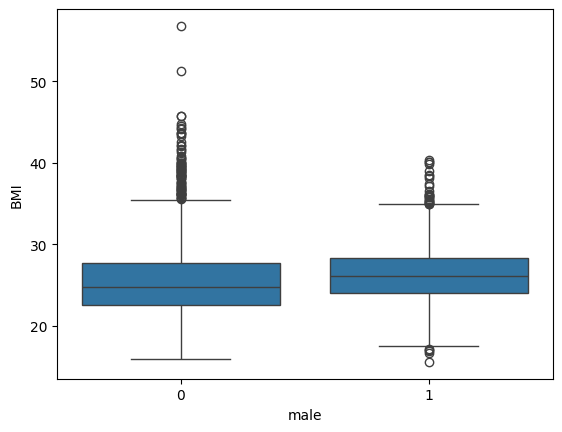

In [52]:
sns.boxplot(y= data["BMI"],x=data["male"])

<Axes: xlabel='male', ylabel='heartRate'>

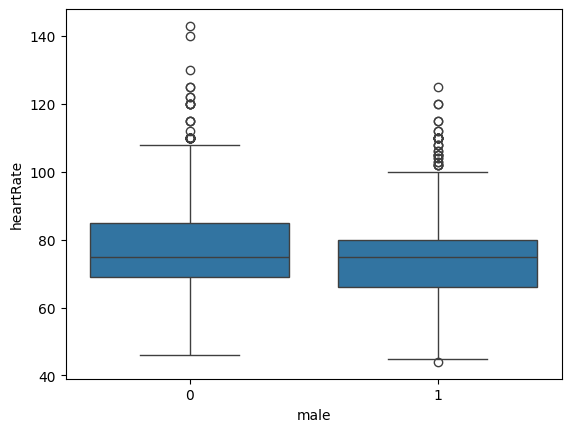

In [53]:
sns.boxplot(y= data["heartRate"],x=data["male"])

<Axes: xlabel='male', ylabel='glucose'>

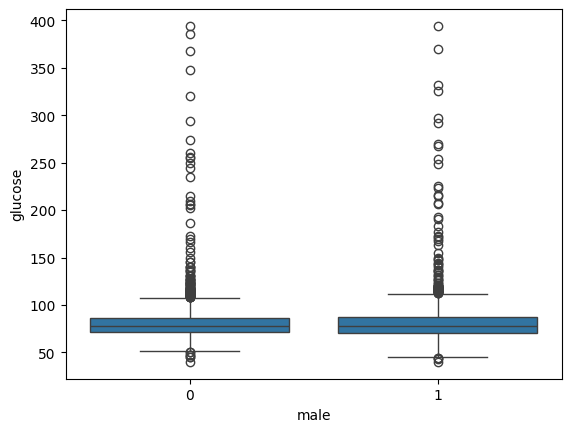

In [54]:
sns.boxplot(y= data["glucose"],x=data["male"])

### Manipulación de Datos

#### De cada variable cuente cuantos datos nulos hay

In [72]:
data.isna().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


#### Utilice dropna para borrar los datos faltantes ¿cuantos datos quedan ?

In [73]:
data=data.dropna()

In [74]:
data.shape

(3656, 16)

In [75]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Seleccione sus variables X y su variable y

In [76]:
X = data[['age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke']]
y = data['TenYearCHD']

#### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
1. ¿De que tamaño queda cada dataset?

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [78]:
X_train.shape

(2559, 5)

In [79]:
X_test.shape

(1097, 5)

#### Entrene el modelo de Regresion logistica usando datos de entrenamiento

In [80]:
y_train.value_counts()

,count
TenYearCHD,
0,2181
1,378


In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

#### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca

_Respuesta:_ La variable que tiene efecto mayor para desarrollar una enfermedad cardiaca es "accidente cerebrovascular prevalente"

In [82]:
logreg.coef_

array([[ 0.08500232, -0.01870609,  0.0341803 ,  0.63753077,  0.9660552 ]])

In [83]:
pd.DataFrame(logreg.coef_, columns= X_train.columns).T

,0
age,0.085002
currentSmoker,-0.018706
cigsPerDay,0.034180
BPMeds,0.637531
prevalentStroke,0.966055


#### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

In [85]:
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,  precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_test)
print(f'Accuracy del modelo: {accuracy:.2f}')

matriz_confusion = confusion_matrix(y_test, y_pred_test)
print('Matriz de Confusión:')
display(matriz_confusion)

reporte = classification_report(y_test, y_pred_test)
print('Reporte de Clasificación:')
print(reporte)

precision = precision_score(y_test, y_pred_test)
print(f"Precisión: {precision:.2f}")

recall = recall_score(y_test, y_pred_test)
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, y_pred_test)
print(f"F1-score: {f1:.2f}")

Accuracy del modelo: 0.84
Matriz de Confusión:


array([[913,   5],
       [173,   6]])

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       918
           1       0.55      0.03      0.06       179

    accuracy                           0.84      1097
   macro avg       0.69      0.51      0.49      1097
weighted avg       0.79      0.84      0.77      1097

Precisión: 0.55
Recall: 0.03
F1-score: 0.06


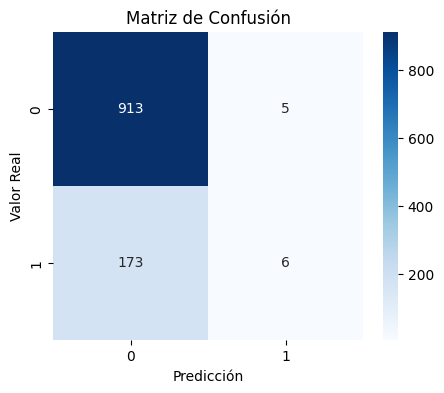

In [87]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, auc

plt.figure(figsize=(5, 4))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


#### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

_Respuesta:_ Se obtuvo una area bajo la curva de 0.67, lo que significa que no es un valor malo del rendimiento del modelo, pero que se podría mejorar.


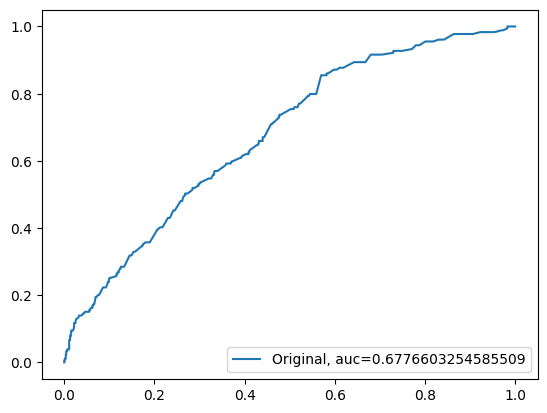

In [89]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Original, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Área bajo la curva ROC: 0.68


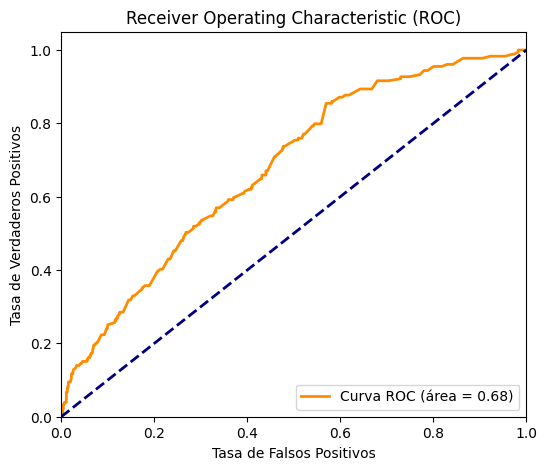

In [90]:
from sklearn.metrics import roc_curve, auc

y_proba = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print(f'Área bajo la curva ROC: {roc_auc:.2f}')

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Corrección desbalance de clases
1. Busque la funcion train_test_split en su codigo y agregue la opcion stratify  = y . Por que esto ayudaría con el desblance?
2. usando from imblearn.over_sampling import SMOTE mejore el performance
 3. Saque todo el modelo y la matriz y la grafica de ROC AUC

 _Respuesta:_ Al usar "Stratify=y", se le indica a "train_test_split" que mantenga la proporción original de las clases en ambos conjuntos, tanto en entrenamiento como en prueba.


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)
model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [119]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,stratify=y, random_state=123)

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

y_pred_smote = model.predict(X_test)
y_pred_proba_smote = model.predict_proba(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_smote)

Text(0.5, 427.9555555555555, 'Predicted label')

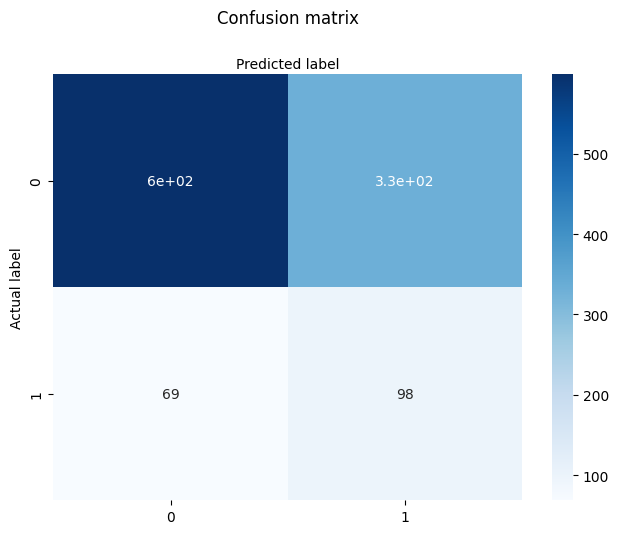

In [99]:
import numpy as np
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [100]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_smote))
print("Precision:",metrics.precision_score(y_test, y_pred_smote))
print("Recall:",metrics.recall_score(y_test,  y_pred_smote))
print("F1-Score:",metrics.f1_score(y_test,  y_pred_smote))

Accuracy: 0.6353691886964449
Precision: 0.22843822843822845
Recall: 0.5868263473053892
F1-Score: 0.3288590604026846


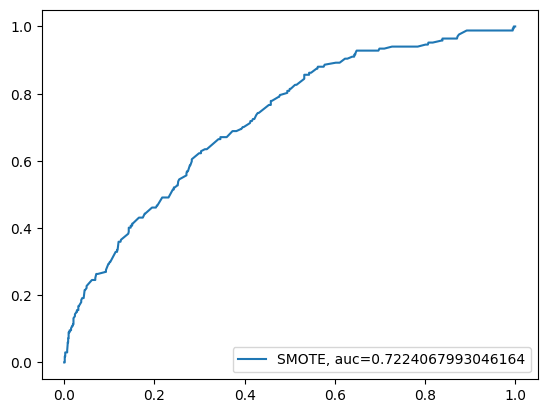

In [110]:
y_pred_proba_smote = model.predict_proba(X_test)[::,1]
fpr_smote, tpr_smote, _ = metrics.roc_curve(y_test,  y_pred_proba_smote)
auc_smote = metrics.roc_auc_score(y_test, y_pred_proba_smote)
plt.plot(fpr_smote,tpr_smote,label="SMOTE, auc="+str(auc_smote))
plt.legend(loc=4)
plt.show()

## Pinter el resultado con SMOTE y sin SMOTE

In [103]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test,  y_pred))
print("F1-Score:",metrics.f1_score(y_test,  y_pred))

Accuracy: 0.8441203281677302
Precision: 0.25
Recall: 0.011976047904191617
F1-Score: 0.022857142857142857


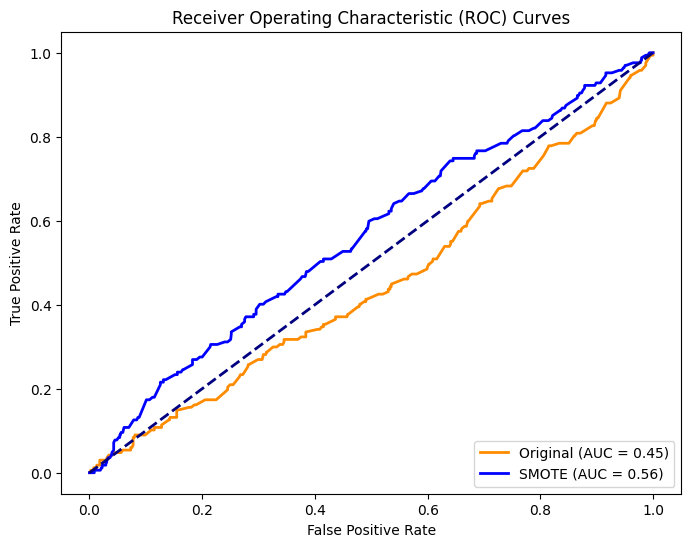

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred_proba_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Original (AUC = %0.2f)' % roc_auc)
plt.plot(fpr_smote, tpr_smote, color='blue', lw=2, label='SMOTE (AUC = %0.2f)' % roc_auc_smote)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

plt.show()

### Como mejora su modelo con StandardScaler()

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


Text(0.5, 23.52222222222222, 'Predicted label')

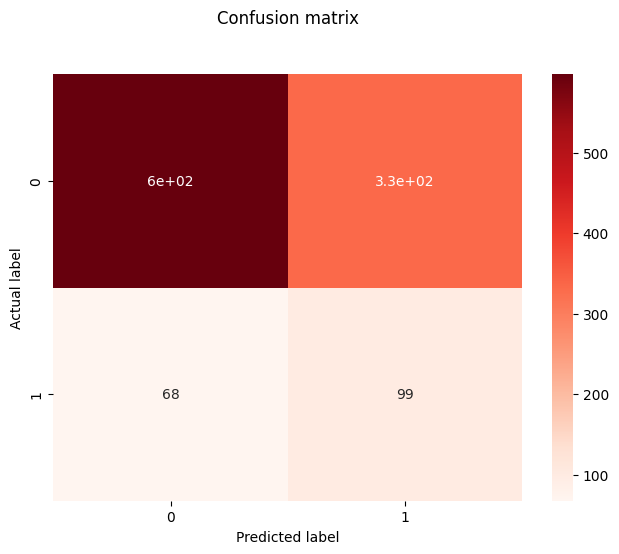

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,stratify=y, random_state=123)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
model_scaled  = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_smote, y_train_smote)
y_pred_smote_scaler = model_scaled.predict(X_test_scaled)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_smote_scaler)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Reds")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


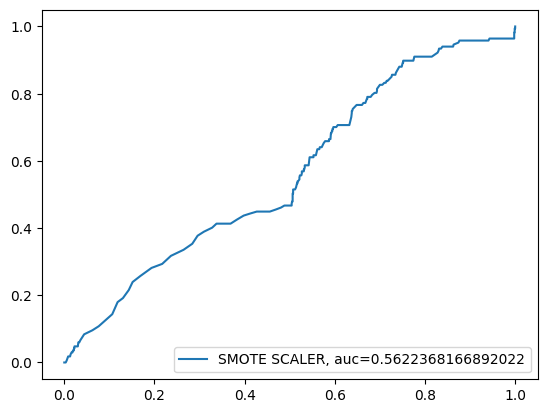

In [116]:
y_pred_proba_smote_scaler= model.predict_proba(X_test_scaled)[::,1]
fpr_scaler, tpr_scaler, _ = metrics.roc_curve(y_test,  y_pred_proba_smote_scaler)
auc_scaler = metrics.roc_auc_score(y_test,y_pred_proba_smote_scaler)
plt.plot(fpr_scaler,tpr_scaler,label="SMOTE SCALER, auc="+str(auc_scaler))
plt.legend(loc=4)
plt.show()


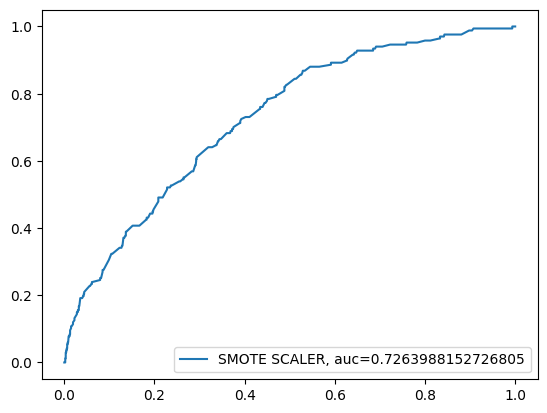

In [ ]:
y_pred_proba_smote_scaler= logreg_scaled.predict_proba(X_test_scaled)[::,1]
fpr_scaler, tpr_scaler, _ = metrics.roc_curve(y_test,  y_pred_proba_smote_scaler)
auc_scaler = metrics.roc_auc_score(y_test,y_pred_proba_smote_scaler)
plt.plot(fpr_scaler,tpr_scaler,label="SMOTE SCALER, auc="+str(auc_scaler))
plt.legend(loc=4)
plt.show()

### Pinte todas las graficas original SMOTE y SMOTE Scaler

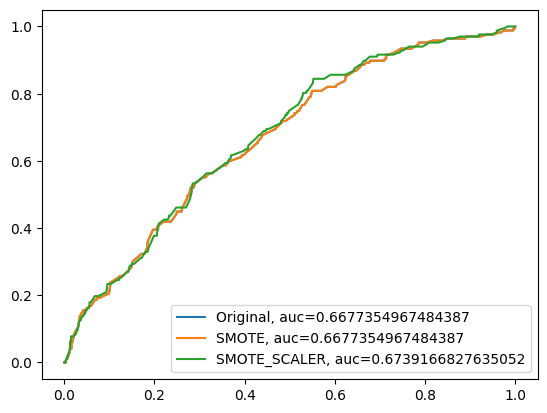

In [118]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Original, auc="+str(auc))

y_pred_proba_smote = model.predict_proba(X_test)[::,1]
fpr_smote, tpr_smote, _ = metrics.roc_curve(y_test,  y_pred_proba_smote)
auc_smote = metrics.roc_auc_score(y_test, y_pred_proba_smote)
plt.plot(fpr_smote,tpr_smote,label="SMOTE, auc="+str(auc_smote))

y_pred_proba_scaler = model_scaled.predict_proba(X_test_scaled)[::,1]
fpr_scaler, tpr_scaler, _ = metrics.roc_curve(y_test,  y_pred_proba_scaler)
auc_scaler = metrics.roc_auc_score(y_test, y_pred_proba_scaler)
plt.plot(fpr_scaler,tpr_scaler,label="SMOTE_SCALER, auc="+str(auc_scaler))


plt.legend(loc=4)
plt.show()